# Goal: Data Cleaning

In [40]:
""" 
Goal: Data Cleaning
Author: Rudra Prasad Bhuyan
"""

' \nGoal: Data Cleaning\nAuthor: Rudra Prasad Bhuyan\n'

In [41]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-03\data\lev-03_merged.parquet"

pdf = pl.read_parquet(path)

In [43]:
pdf.collect_schema()

Schema([('Survey_Name', String),
        ('Year', String),
        ('FSU_Serial_No', String),
        ('Sector', String),
        ('State', String),
        ('NSS_Region', String),
        ('District', String),
        ('Stratum', String),
        ('Sub_stratum', String),
        ('Panel', String),
        ('Sub_sample', String),
        ('FOD_Sub_Region', String),
        ('Sample_SU_No', String),
        ('Sample_Sub_Division_No', String),
        ('Second_Stage_Stratum_No', String),
        ('Sample_Household_No', String),
        ('Questionnaire_No', String),
        ('Level', String),
        ('HH_Size_FDQ', Float64),
        ('Engaged_in_Economic_Activity_Las', String),
        ('NCO_2015_Code', String),
        ('NIC_2008_Code', String),
        ('Max_Income_Activity', String),
        ('Self_Employment_Source_Sector', String),
        ('Regular_Wage_Source_Sector', String),
        ('Casual_Labour_Source_Sector', String),
        ('Household_Type', String),
        ('Religion_o

In [44]:
mp_data = pdf.filter(
    pl.col('State') == '23'
)

In [45]:
mp_data['State'].unique()

shape: (1,)
Series: 'State' [str]
[
	"23"
]

# Break down all useful variables into separate group

In [46]:
lev_03_hh = ['FSU_Serial_No', 'HH_Size_FDQ', 'Household_Type',
            'Religion_of_HH_Head', 'Land_Ownership',
            'Type_of_Land_Owned','Total_Area_Land_Owned_Acres',
            'Energy_Source_Cooking', 'Energy_Source_Lighting',
            'Dwelling_Unit_Exists', 'Type_of_Dwelling_Unit',
            'Rent_Rate_Available_Rural', 'Multiplier']

lev_03_fin = [
    'Self_Employment_Source_Sector','Regular_Wage_Source_Sector',
    'Casual_Labour_Source_Sector']

lev_03_occupation = [
    'Engaged_in_Economic_Activity_Las',	'Max_Income_Activity']

lev_03_scheme = ['Benefitted_From_PMGKY']

In [47]:
lev_03_cols = (
    lev_03_hh
    + lev_03_fin
    + lev_03_occupation
    + lev_03_scheme
)

mp_data = mp_data[lev_03_cols]

mp_data

shape: (56_420, 19)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ FSU_Seria ‚îÜ HH_Size_F ‚îÜ Household ‚îÜ Religion_ ‚îÜ ‚Ä¶ ‚îÜ Casual_La ‚îÜ Engaged_i ‚îÜ Max_Incom ‚îÜ Benefitt ‚îÇ
‚îÇ l_No      ‚îÜ DQ        ‚îÜ _Type     ‚îÜ of_HH_Hea ‚îÜ   ‚îÜ bour_Sour ‚îÜ n_Economi ‚îÜ e_Activit ‚îÜ ed_From_ ‚îÇ
‚îÇ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ d         ‚îÜ   ‚îÜ ce_Sector ‚îÜ c_Activit ‚îÜ y         ‚îÜ PMGKY    ‚îÇ
‚îÇ str       ‚îÜ f64       ‚îÜ str       ‚îÜ ---       ‚îÜ   ‚îÜ ---       ‚îÜ y_L‚Ä¶      ‚îÜ ---       ‚îÜ ---      ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ           ‚îÜ str       ‚îÜ   ‚îÜ str       ‚îÜ ---       ‚îÜ str       ‚îÜ str      ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ str       ‚îÜ           ‚îÜ          ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 44085     ‚îÜ 7.0       ‚îÜ 1         ‚îÜ 1         ‚îÜ ‚Ä¶ ‚îÜ           ‚îÜ 1         ‚îÜ 1         ‚îÜ 1        ‚îÇ
‚îÇ 44085     ‚îÜ 7.0       ‚îÜ 1         ‚îÜ 1         ‚îÜ ‚Ä¶ ‚îÜ           ‚îÜ 1         ‚îÜ 1         ‚îÜ 1        ‚îÇ
‚îÇ 44085     ‚îÜ 7.0       ‚îÜ 1         ‚îÜ 1         ‚îÜ ‚Ä¶ ‚îÜ           ‚îÜ 1         ‚îÜ 1         ‚îÜ 1        ‚îÇ
‚îÇ 44085     ‚îÜ 7.0       ‚îÜ 1         ‚îÜ 1         ‚îÜ ‚Ä¶ ‚îÜ           ‚îÜ 1         ‚îÜ 1         ‚îÜ 1        ‚îÇ
‚îÇ 44085     ‚îÜ 13.0      ‚îÜ 5         ‚îÜ 1         ‚îÜ ‚Ä¶ ‚îÜ 5         ‚îÜ 1         ‚îÜ 3         ‚îÜ 1        ‚îÇ
‚îÇ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶        ‚îÇ
‚îÇ 25137     ‚îÜ 5.0       ‚îÜ 1         ‚îÜ 1         ‚îÜ ‚Ä¶ ‚îÜ           ‚îÜ 1         ‚îÜ 1         ‚îÜ 1        ‚îÇ
‚îÇ 25137     ‚îÜ 3.0       ‚îÜ 1         ‚îÜ 1         ‚îÜ ‚Ä¶ ‚îÜ           ‚îÜ 1         ‚îÜ 1         ‚îÜ 2        ‚îÇ
‚îÇ 25137     ‚îÜ 4.0       ‚îÜ 2         ‚îÜ 1         ‚îÜ ‚Ä¶ ‚îÜ           ‚îÜ 1         ‚îÜ 2         ‚îÜ 1        ‚îÇ
‚îÇ 25137     ‚îÜ 5.0       ‚îÜ 2         ‚îÜ 5         ‚îÜ ‚Ä¶ ‚îÜ           ‚îÜ 1         ‚îÜ 2         ‚îÜ 2        ‚îÇ
‚îÇ 25137     ‚îÜ 5.0       ‚îÜ 1         ‚îÜ 1         ‚îÜ ‚Ä¶ ‚îÜ           ‚îÜ 1         ‚îÜ 1         ‚îÜ 1        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [48]:
mp_data['FSU_Serial_No'].n_unique()

791

# Conversion

In [49]:
mp_data = mp_data.with_columns(
    [pl.col(col).cast(pl.Int32, strict=False) for col in lev_03_cols]
)

In [50]:
mp_data.collect_schema()

Schema([('FSU_Serial_No', Int32),
        ('HH_Size_FDQ', Int32),
        ('Household_Type', Int32),
        ('Religion_of_HH_Head', Int32),
        ('Land_Ownership', Int32),
        ('Type_of_Land_Owned', Int32),
        ('Total_Area_Land_Owned_Acres', Int32),
        ('Energy_Source_Cooking', Int32),
        ('Energy_Source_Lighting', Int32),
        ('Dwelling_Unit_Exists', Int32),
        ('Type_of_Dwelling_Unit', Int32),
        ('Rent_Rate_Available_Rural', Int32),
        ('Multiplier', Int32),
        ('Self_Employment_Source_Sector', Int32),
        ('Regular_Wage_Source_Sector', Int32),
        ('Casual_Labour_Source_Sector', Int32),
        ('Engaged_in_Economic_Activity_Las', Int32),
        ('Max_Income_Activity', Int32),
        ('Benefitted_From_PMGKY', Int32)])

# Functions

In [51]:
def summary(col):
    display(mp_data[col].sample(3))
    display(mp_data[col].describe())
    display(mp_data[col].null_count())
    display(mp_data[col].null_count() / mp_data.shape[0])

In [52]:
def plot_hist(col):
    sns.histplot(mp_data[col])
    plt.title(col)
    plt.show()

In [53]:
def check_unique(col):
    print(f"{col} contains : {mp_data[col].n_unique()}")
    display(mp_data[col].unique())

# Data

## Household 

In [54]:
summary(lev_03_hh)

shape: (3, 13)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ FSU_Seria ‚îÜ HH_Size_F ‚îÜ Household ‚îÜ Religion_ ‚îÜ ‚Ä¶ ‚îÜ Dwelling_ ‚îÜ Type_of_D ‚îÜ Rent_Rate ‚îÜ Multipli ‚îÇ
‚îÇ l_No      ‚îÜ DQ        ‚îÜ _Type     ‚îÜ of_HH_Hea ‚îÜ   ‚îÜ Unit_Exis ‚îÜ welling_U ‚îÜ _Availabl ‚îÜ er       ‚îÇ
‚îÇ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ d         ‚îÜ   ‚îÜ ts        ‚îÜ nit       ‚îÜ e_Rural   ‚îÜ ---      ‚îÇ
‚îÇ i32       ‚îÜ i32       ‚îÜ i32       ‚îÜ ---       ‚îÜ   ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ i32      ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ           ‚îÜ i32       ‚îÜ   ‚îÜ i32       ‚îÜ i32       ‚îÜ i32       ‚îÜ          ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 42316     ‚îÜ 8         ‚îÜ 2         ‚îÜ 1         ‚îÜ ‚Ä¶ ‚îÜ 1         ‚îÜ 1         ‚îÜ 2         ‚îÜ 141721   ‚îÇ
‚îÇ 44007     ‚îÜ 4         ‚îÜ 1         ‚îÜ 1         ‚îÜ ‚Ä¶ ‚îÜ 1         ‚îÜ 1         ‚îÜ 2         ‚îÜ 133375   ‚îÇ
‚îÇ 25222     ‚îÜ 5         ‚îÜ 2         ‚îÜ 1         ‚îÜ ‚Ä¶ ‚îÜ 1         ‚îÜ 1         ‚îÜ null      ‚îÜ 188772   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (9, 14)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic ‚îÜ FSU_Seria ‚îÜ HH_Size_F ‚îÜ Household ‚îÜ ‚Ä¶ ‚îÜ Dwelling_ ‚îÜ Type_of_D ‚îÜ Rent_Rate ‚îÜ Multipli ‚îÇ
‚îÇ ---       ‚îÜ l_No      ‚îÜ DQ        ‚îÜ _Type     ‚îÜ   ‚îÜ Unit_Exis ‚îÜ welling_U ‚îÜ _Availabl ‚îÜ er       ‚îÇ
‚îÇ str       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ   ‚îÜ ts        ‚îÜ nit       ‚îÜ e_Rural   ‚îÜ ---      ‚îÇ
‚îÇ           ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÜ   ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ f64      ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÜ          ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count     ‚îÜ 56420.0   ‚îÜ 56420.0   ‚îÜ 56420.0   ‚îÜ ‚Ä¶ ‚îÜ 56420.0   ‚îÜ 55600.0   ‚îÜ 33704.0   ‚îÜ 56420.0  ‚îÇ
‚îÇ null_coun ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ ‚Ä¶ ‚îÜ 0.0       ‚îÜ 820.0     ‚îÜ 22716.0   ‚îÜ 0.0      ‚îÇ
‚îÇ t         ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ          ‚îÇ
‚îÇ mean      ‚îÜ 35892.134 ‚îÜ 4.598653  ‚îÜ 2.792272  ‚îÜ ‚Ä¶ ‚îÜ 1.014534  ‚îÜ 1.105468  ‚îÜ 1.897342  ‚îÜ 111667.1 ‚îÇ
‚îÇ           ‚îÜ 208       ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ 15207    ‚îÇ
‚îÇ std       ‚îÜ 8662.8607 ‚îÜ 2.152007  ‚îÜ 2.314186  ‚îÜ ‚Ä¶ ‚îÜ 0.119678  ‚îÜ 0.337938  ‚îÜ 0.303517  ‚îÜ 70936.05 ‚îÇ
‚îÇ           ‚îÜ 68        ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ 0835     ‚îÇ
‚îÇ min       ‚îÜ 25000.0   ‚îÜ 1.0       ‚îÜ 1.0       ‚îÜ ‚Ä¶ ‚îÜ 1.0       ‚îÜ 1.0       ‚îÜ 1.0       ‚îÜ 1913.0   ‚îÇ
‚îÇ 25%       ‚îÜ 25278.0   ‚îÜ 3.0       ‚îÜ 1.0       ‚îÜ ‚Ä¶ ‚îÜ 1.0       ‚îÜ 1.0       ‚îÜ 2.0       ‚îÜ 64751.0  ‚îÇ
‚îÇ 50%       ‚îÜ 42377.0   ‚îÜ 4.0       ‚îÜ 2.0       ‚îÜ ‚Ä¶ ‚îÜ 1.0       ‚îÜ 1.0       ‚îÜ 2.0       ‚îÜ 114789.0 ‚îÇ
‚îÇ 75%       ‚îÜ 42727.0   ‚îÜ 6.0       ‚îÜ 5.0       ‚îÜ ‚Ä¶ ‚îÜ 1.0       ‚îÜ 1.0       ‚îÜ 2.0       ‚îÜ 145525.0 ‚îÇ
‚îÇ max       ‚îÜ 44199.0   ‚îÜ 31.0      ‚îÜ 9.0       ‚îÜ ‚Ä¶ ‚îÜ 2.0       ‚îÜ 3.0       ‚îÜ 2.0       ‚îÜ 888474.0 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (1, 13)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ FSU_Seria ‚îÜ HH_Size_F ‚îÜ Household ‚îÜ Religion_ ‚îÜ ‚Ä¶ ‚îÜ Dwelling_ ‚îÜ Type_of_D ‚îÜ Rent_Rate ‚îÜ Multipli ‚îÇ
‚îÇ l_No      ‚îÜ DQ        ‚îÜ _Type     ‚îÜ of_HH_Hea ‚îÜ   ‚îÜ Unit_Exis ‚îÜ welling_U ‚îÜ _Availabl ‚îÜ er       ‚îÇ
‚îÇ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ d         ‚îÜ   ‚îÜ ts        ‚îÜ nit       ‚îÜ e_Rural   ‚îÜ ---      ‚îÇ
‚îÇ u32       ‚îÜ u32       ‚îÜ u32       ‚îÜ ---       ‚îÜ   ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ u32      ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ           ‚îÜ u32       ‚îÜ   ‚îÜ u32       ‚îÜ u32       ‚îÜ u32       ‚îÜ          ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0         ‚îÜ 0         ‚îÜ 0         ‚îÜ 0         ‚îÜ ‚Ä¶ ‚îÜ 0         ‚îÜ 820       ‚îÜ 22716     ‚îÜ 0        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (1, 13)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ FSU_Seria ‚îÜ HH_Size_F ‚îÜ Household ‚îÜ Religion_ ‚îÜ ‚Ä¶ ‚îÜ Dwelling_ ‚îÜ Type_of_D ‚îÜ Rent_Rate ‚îÜ Multipli ‚îÇ
‚îÇ l_No      ‚îÜ DQ        ‚îÜ _Type     ‚îÜ of_HH_Hea ‚îÜ   ‚îÜ Unit_Exis ‚îÜ welling_U ‚îÜ _Availabl ‚îÜ er       ‚îÇ
‚îÇ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ d         ‚îÜ   ‚îÜ ts        ‚îÜ nit       ‚îÜ e_Rural   ‚îÜ ---      ‚îÇ
‚îÇ f64       ‚îÜ f64       ‚îÜ f64       ‚îÜ ---       ‚îÜ   ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ f64      ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ           ‚îÜ f64       ‚îÜ   ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÜ          ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ ‚Ä¶ ‚îÜ 0.0       ‚îÜ 0.014534  ‚îÜ 0.402623  ‚îÜ 0.0      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

<Axes: ylabel='Count'>

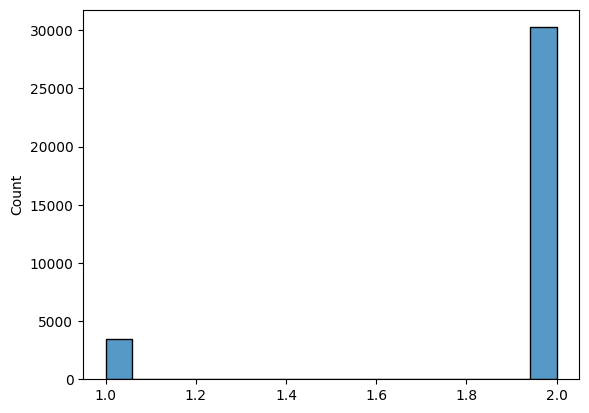

In [55]:
sns.histplot(mp_data['Rent_Rate_Available_Rural'])

In [56]:
display(mp_data['Rent_Rate_Available_Rural'].describe())

shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ value    ‚îÇ
‚îÇ ---        ‚îÜ ---      ‚îÇ
‚îÇ str        ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 33704.0  ‚îÇ
‚îÇ null_count ‚îÜ 22716.0  ‚îÇ
‚îÇ mean       ‚îÜ 1.897342 ‚îÇ
‚îÇ std        ‚îÜ 0.303517 ‚îÇ
‚îÇ min        ‚îÜ 1.0      ‚îÇ
‚îÇ 25%        ‚îÜ 2.0      ‚îÇ
‚îÇ 50%        ‚îÜ 2.0      ‚îÇ
‚îÇ 75%        ‚îÜ 2.0      ‚îÇ
‚îÇ max        ‚îÜ 2.0      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [57]:
mp_data = mp_data.with_columns(
    pl.col('Rent_Rate_Available_Rural').fill_null(value='Two')
)

<Axes: ylabel='Count'>

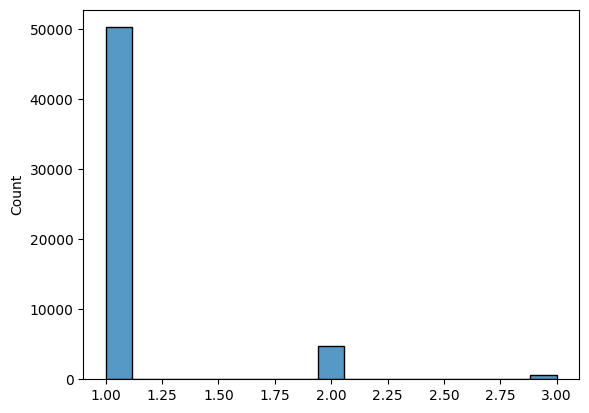

In [58]:
sns.histplot(mp_data['Type_of_Dwelling_Unit'])

In [59]:
mp_data['Type_of_Dwelling_Unit'].describe()

shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ value    ‚îÇ
‚îÇ ---        ‚îÜ ---      ‚îÇ
‚îÇ str        ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 55600.0  ‚îÇ
‚îÇ null_count ‚îÜ 820.0    ‚îÇ
‚îÇ mean       ‚îÜ 1.105468 ‚îÇ
‚îÇ std        ‚îÜ 0.337938 ‚îÇ
‚îÇ min        ‚îÜ 1.0      ‚îÇ
‚îÇ 25%        ‚îÜ 1.0      ‚îÇ
‚îÇ 50%        ‚îÜ 1.0      ‚îÇ
‚îÇ 75%        ‚îÜ 1.0      ‚îÇ
‚îÇ max        ‚îÜ 3.0      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [60]:
mp_data = mp_data.with_columns(
    pl.col('Type_of_Dwelling_Unit').fill_null(strategy='one')
)

In [61]:
mp_data.height

56420

In [62]:
mp_data['Total_Area_Land_Owned_Acres'].describe()

shape: (2, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ value   ‚îÇ
‚îÇ ---        ‚îÜ ---     ‚îÇ
‚îÇ str        ‚îÜ f64     ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 0.0     ‚îÇ
‚îÇ null_count ‚îÜ 56420.0 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

<Axes: ylabel='Count'>

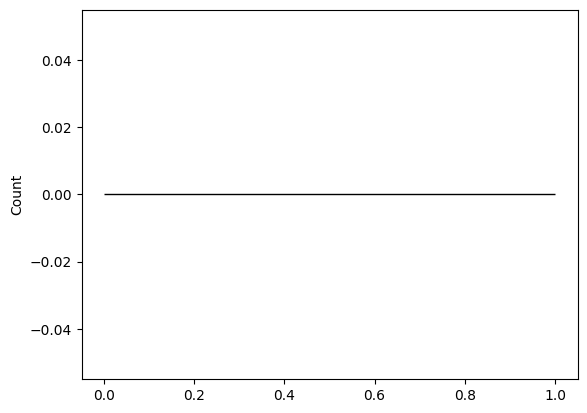

In [63]:
sns.histplot(mp_data['Total_Area_Land_Owned_Acres'])

In [64]:
# No data in this feature better to delete
# I think may be govt survey so black land no one interest to say to surrey guy
#mp_data = mp_data.drop(pl.col('Total_Area_Land_Owned_Acres'))

Rent_Rate_Available_Rural contains : 3


shape: (3,)
Series: 'Rent_Rate_Available_Rural' [str]
[
	"Two"
	"2"
	"1"
]

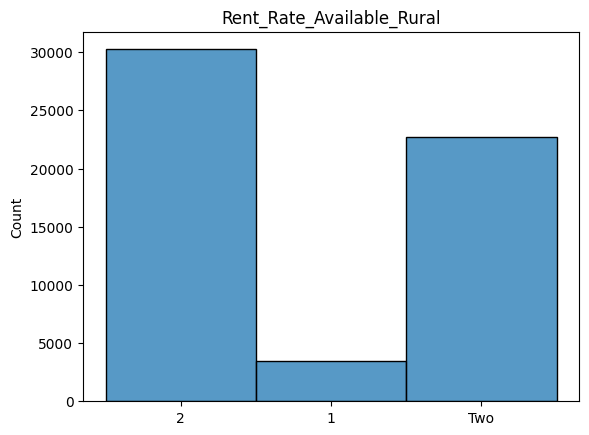

Rent_Rate_Available_Rural contains : 3


shape: (3,)
Series: 'Rent_Rate_Available_Rural' [str]
[
	"1"
	"2"
	"Two"
]

In [65]:
check_unique('Rent_Rate_Available_Rural')

plot_hist('Rent_Rate_Available_Rural')

mp_data = mp_data.with_columns(
    pl.col('Rent_Rate_Available_Rural').fill_null(value=3)
)

check_unique('Rent_Rate_Available_Rural')

Type_of_Dwelling_Unit contains : 3


shape: (3,)
Series: 'Type_of_Dwelling_Unit' [i32]
[
	1
	2
	3
]

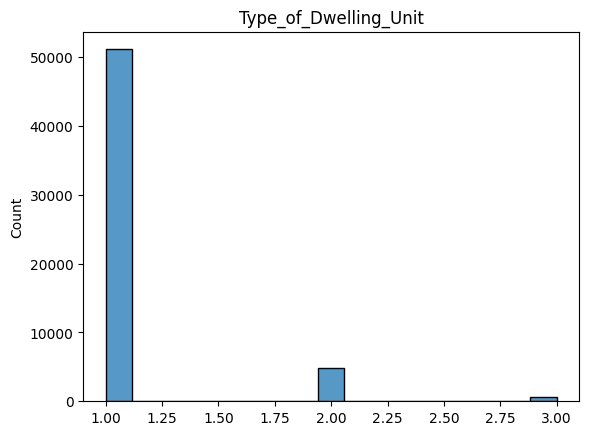

Type_of_Dwelling_Unit contains : 3


shape: (3,)
Series: 'Type_of_Dwelling_Unit' [i32]
[
	1
	2
	3
]

In [66]:
check_unique('Type_of_Dwelling_Unit')

plot_hist('Type_of_Dwelling_Unit')

mp_data = mp_data.with_columns(
    pl.col('Type_of_Dwelling_Unit').fill_null(value=3)
)

check_unique('Type_of_Dwelling_Unit')

shape: (4,)
Series: 'Type_of_Land_Owned' [i32]
[
	null
	1
	2
	3
]

shape: (3,)
Series: 'Type_of_Land_Owned' [i32]
[
	1
	2
	3
]

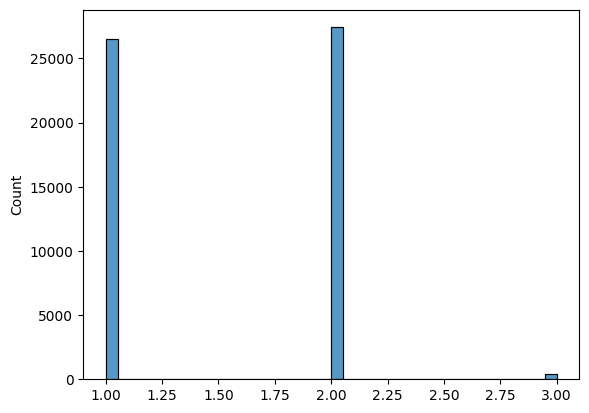

In [67]:
# Just to support the 3 üòÅ

display(mp_data['Type_of_Land_Owned'].unique())
sns.histplot(mp_data['Type_of_Land_Owned'])

mp_data = mp_data.with_columns(
    pl.col('Type_of_Land_Owned').fill_null(value=3)
)

display(mp_data['Type_of_Land_Owned'].unique())

In [68]:
mp_data[lev_03_hh].columns

['FSU_Serial_No',
 'HH_Size_FDQ',
 'Household_Type',
 'Religion_of_HH_Head',
 'Land_Ownership',
 'Type_of_Land_Owned',
 'Total_Area_Land_Owned_Acres',
 'Energy_Source_Cooking',
 'Energy_Source_Lighting',
 'Dwelling_Unit_Exists',
 'Type_of_Dwelling_Unit',
 'Rent_Rate_Available_Rural',
 'Multiplier']

In [69]:
for col in mp_data[lev_03_hh].columns:
    display(f" ========== {col} ========")
    display(check_unique(col))
    display("-------------------------------------------------")

' ========== FSU_Serial_No ========'

FSU_Serial_No contains : 791


shape: (791,)
Series: 'FSU_Serial_No' [i32]
[
	25000
	25001
	25002
	25003
	25004
	‚Ä¶
	44195
	44196
	44197
	44198
	44199
]

None

'-------------------------------------------------'

' ========== HH_Size_FDQ ========'

HH_Size_FDQ contains : 20


shape: (20,)
Series: 'HH_Size_FDQ' [i32]
[
	1
	2
	3
	4
	5
	‚Ä¶
	16
	17
	18
	25
	31
]

None

'-------------------------------------------------'

' ========== Household_Type ========'

Household_Type contains : 7


shape: (7,)
Series: 'Household_Type' [i32]
[
	1
	2
	3
	4
	5
	6
	9
]

None

'-------------------------------------------------'

' ========== Religion_of_HH_Head ========'

Religion_of_HH_Head contains : 7


shape: (7,)
Series: 'Religion_of_HH_Head' [i32]
[
	1
	2
	3
	4
	5
	7
	9
]

None

'-------------------------------------------------'

' ========== Land_Ownership ========'

Land_Ownership contains : 2


shape: (2,)
Series: 'Land_Ownership' [i32]
[
	1
	2
]

None

'-------------------------------------------------'

' ========== Type_of_Land_Owned ========'

Type_of_Land_Owned contains : 3


shape: (3,)
Series: 'Type_of_Land_Owned' [i32]
[
	1
	2
	3
]

None

'-------------------------------------------------'

' ========== Total_Area_Land_Owned_Acres ========'

Total_Area_Land_Owned_Acres contains : 1


shape: (1,)
Series: 'Total_Area_Land_Owned_Acres' [i32]
[
	null
]

None

'-------------------------------------------------'

' ========== Energy_Source_Cooking ========'

Energy_Source_Cooking contains : 9


shape: (9,)
Series: 'Energy_Source_Cooking' [i32]
[
	1
	2
	3
	4
	6
	7
	9
	11
	12
]

None

'-------------------------------------------------'

' ========== Energy_Source_Lighting ========'

Energy_Source_Lighting contains : 5


shape: (5,)
Series: 'Energy_Source_Lighting' [i32]
[
	1
	2
	5
	6
	9
]

None

'-------------------------------------------------'

' ========== Dwelling_Unit_Exists ========'

Dwelling_Unit_Exists contains : 2


shape: (2,)
Series: 'Dwelling_Unit_Exists' [i32]
[
	1
	2
]

None

'-------------------------------------------------'

' ========== Type_of_Dwelling_Unit ========'

Type_of_Dwelling_Unit contains : 3


shape: (3,)
Series: 'Type_of_Dwelling_Unit' [i32]
[
	1
	2
	3
]

None

'-------------------------------------------------'

' ========== Rent_Rate_Available_Rural ========'

Rent_Rate_Available_Rural contains : 3


shape: (3,)
Series: 'Rent_Rate_Available_Rural' [str]
[
	"2"
	"Two"
	"1"
]

None

'-------------------------------------------------'

' ========== Multiplier ========'

Multiplier contains : 1421


shape: (1_421,)
Series: 'Multiplier' [i32]
[
	1913
	1983
	2250
	2400
	3000
	‚Ä¶
	613888
	653383
	828400
	884938
	888474
]

None

'-------------------------------------------------'

## Finance

In [70]:
summary(lev_03_fin)

shape: (3, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Self_Employment_Source_Sector ‚îÜ Regular_Wage_Source_Sector ‚îÜ Casual_Labour_Source_Sector ‚îÇ
‚îÇ ---                           ‚îÜ ---                        ‚îÜ ---                         ‚îÇ
‚îÇ i32                           ‚îÜ i32                        ‚îÜ i32                         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1                             ‚îÜ null                       ‚îÜ null                        ‚îÇ
‚îÇ null                          ‚îÜ null                       ‚îÜ null                        ‚îÇ
‚îÇ null                          ‚îÜ null                       ‚îÜ 5                           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (9, 4)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ Self_Employment_Source_Sec ‚îÜ Regular_Wage_Source_Sector ‚îÜ Casual_Labour_Source_Sect ‚îÇ
‚îÇ ---        ‚îÜ tor                        ‚îÜ ---                        ‚îÜ or                        ‚îÇ
‚îÇ str        ‚îÜ ---                        ‚îÜ f64                        ‚îÜ ---                       ‚îÇ
‚îÇ            ‚îÜ f64                        ‚îÜ                            ‚îÜ f64                       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 19176.0                    ‚îÜ 1920.0                     ‚îÜ 11812.0                   ‚îÇ
‚îÇ null_count ‚îÜ 37244.0                    ‚îÜ 54500.0                    ‚îÜ 44608.0                   ‚îÇ
‚îÇ mean       ‚îÜ 1.133292                   ‚îÜ 3.941667                   ‚îÜ 5.43041                   ‚îÇ
‚îÇ std        ‚îÜ 0.339898                   ‚îÜ 0.234434                   ‚îÜ 0.495154                  ‚îÇ
‚îÇ min        ‚îÜ 1.0                        ‚îÜ 3.0                        ‚îÜ 5.0                       ‚îÇ
‚îÇ 25%        ‚îÜ 1.0                        ‚îÜ 4.0                        ‚îÜ 5.0                       ‚îÇ
‚îÇ 50%        ‚îÜ 1.0                        ‚îÜ 4.0                        ‚îÜ 5.0                       ‚îÇ
‚îÇ 75%        ‚îÜ 1.0                        ‚îÜ 4.0                        ‚îÜ 6.0                       ‚îÇ
‚îÇ max        ‚îÜ 2.0                        ‚îÜ 4.0                        ‚îÜ 6.0                       ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (1, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Self_Employment_Source_Sector ‚îÜ Regular_Wage_Source_Sector ‚îÜ Casual_Labour_Source_Sector ‚îÇ
‚îÇ ---                           ‚îÜ ---                        ‚îÜ ---                         ‚îÇ
‚îÇ u32                           ‚îÜ u32                        ‚îÜ u32                         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 37244                         ‚îÜ 54500                      ‚îÜ 44608                       ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (1, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Self_Employment_Source_Sector ‚îÜ Regular_Wage_Source_Sector ‚îÜ Casual_Labour_Source_Sector ‚îÇ
‚îÇ ---                           ‚îÜ ---                        ‚îÜ ---                         ‚îÇ
‚îÇ f64                           ‚îÜ f64                        ‚îÜ f64                         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0.660121                      ‚îÜ 0.96597                    ‚îÜ 0.790642                    ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [72]:
mp_data['Self_Employment_Source_Sector'].describe()

shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ value    ‚îÇ
‚îÇ ---        ‚îÜ ---      ‚îÇ
‚îÇ str        ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 19176.0  ‚îÇ
‚îÇ null_count ‚îÜ 37244.0  ‚îÇ
‚îÇ mean       ‚îÜ 1.133292 ‚îÇ
‚îÇ std        ‚îÜ 0.339898 ‚îÇ
‚îÇ min        ‚îÜ 1.0      ‚îÇ
‚îÇ 25%        ‚îÜ 1.0      ‚îÇ
‚îÇ 50%        ‚îÜ 1.0      ‚îÇ
‚îÇ 75%        ‚îÜ 1.0      ‚îÇ
‚îÇ max        ‚îÜ 2.0      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

<Axes: ylabel='Count'>

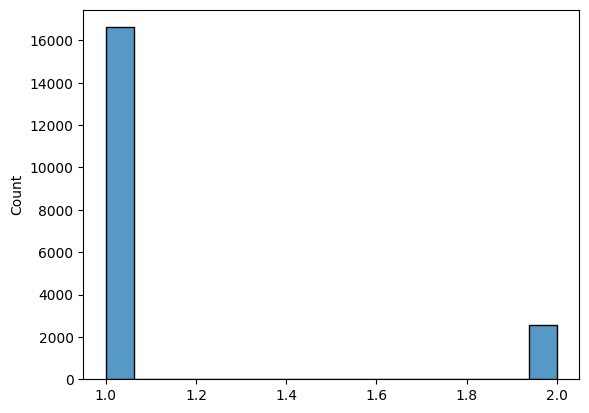

In [71]:
sns.histplot(mp_data['Self_Employment_Source_Sector'])

In [84]:
mp_data = mp_data.with_columns(
    pl.col('Self_Employment_Source_Sector').fill_null(value=1)
)

In [77]:
mp_data['Casual_Labour_Source_Sector'].describe(percentiles=[0.5, 0.65, 0.75, 0.85, 0.95]).to_pandas()

statistic         value
0        count  11812.000000
1   null_count  44608.000000
2         mean      5.430410
3          std      0.495154
4          min      5.000000
5          50%      5.000000
6          65%      6.000000
7          75%      6.000000
8          85%      6.000000
9          95%      6.000000
10         max      6.000000

<Axes: ylabel='Count'>

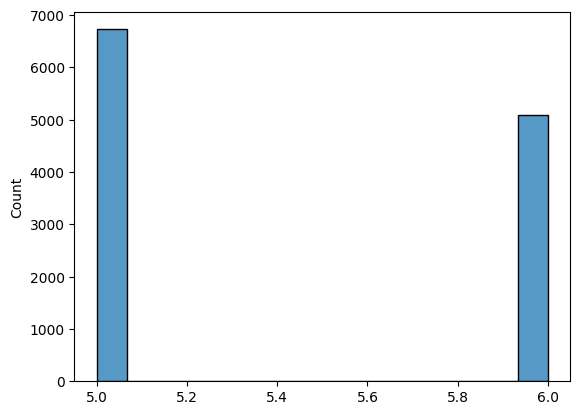

In [73]:
sns.histplot(mp_data['Casual_Labour_Source_Sector'])

In [78]:
mp_data = mp_data.with_columns(
    pl.col('Casual_Labour_Source_Sector').fill_null(value=6)
)

In [80]:
mp_data['Regular_Wage_Source_Sector'].describe()

shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ value    ‚îÇ
‚îÇ ---        ‚îÜ ---      ‚îÇ
‚îÇ str        ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 1920.0   ‚îÇ
‚îÇ null_count ‚îÜ 54500.0  ‚îÇ
‚îÇ mean       ‚îÜ 3.941667 ‚îÇ
‚îÇ std        ‚îÜ 0.234434 ‚îÇ
‚îÇ min        ‚îÜ 3.0      ‚îÇ
‚îÇ 25%        ‚îÜ 4.0      ‚îÇ
‚îÇ 50%        ‚îÜ 4.0      ‚îÇ
‚îÇ 75%        ‚îÜ 4.0      ‚îÇ
‚îÇ max        ‚îÜ 4.0      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

<Axes: ylabel='Count'>

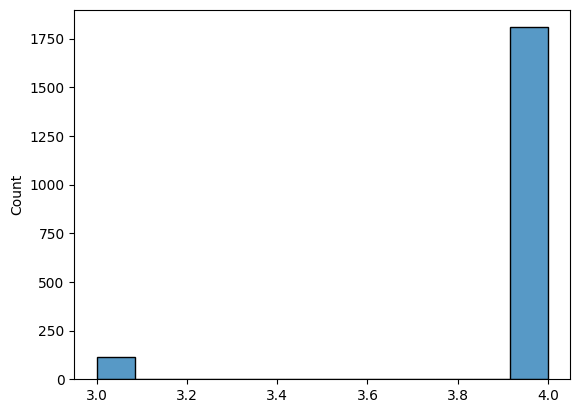

In [79]:
sns.histplot(mp_data['Regular_Wage_Source_Sector'])

In [81]:
mp_data = mp_data.with_columns(
    pl.col('Regular_Wage_Source_Sector').fill_null(value=4)
)

In [82]:
mp_data[lev_03_fin].columns

['Self_Employment_Source_Sector',
 'Regular_Wage_Source_Sector',
 'Casual_Labour_Source_Sector']

In [85]:
for col in mp_data[lev_03_fin].columns:
    display(f" ========== {col} ========")
    display(check_unique(col))
    display("-------------------------------------------------")

' ========== Self_Employment_Source_Sector ========'

Self_Employment_Source_Sector contains : 2


shape: (2,)
Series: 'Self_Employment_Source_Sector' [i32]
[
	1
	2
]

None

'-------------------------------------------------'

' ========== Regular_Wage_Source_Sector ========'

Regular_Wage_Source_Sector contains : 2


shape: (2,)
Series: 'Regular_Wage_Source_Sector' [i32]
[
	3
	4
]

None

'-------------------------------------------------'

' ========== Casual_Labour_Source_Sector ========'

Casual_Labour_Source_Sector contains : 2


shape: (2,)
Series: 'Casual_Labour_Source_Sector' [i32]
[
	5
	6
]

None

'-------------------------------------------------'

## Occupation & Schemes

In [86]:
summary(lev_03_occupation)

shape: (3, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Engaged_in_Economic_Activity_L‚Ä¶ ‚îÜ Max_Income_Activity ‚îÇ
‚îÇ ---                             ‚îÜ ---                 ‚îÇ
‚îÇ i32                             ‚îÜ i32                 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1                               ‚îÜ 1                   ‚îÇ
‚îÇ 1                               ‚îÜ 1                   ‚îÇ
‚îÇ 1                               ‚îÜ 1                   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (9, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ Engaged_in_Economic_Activity_L‚Ä¶ ‚îÜ Max_Income_Activity ‚îÇ
‚îÇ ---        ‚îÜ ---                             ‚îÜ ---                 ‚îÇ
‚îÇ str        ‚îÜ f64                             ‚îÜ f64                 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 56420.0                         ‚îÜ 53172.0             ‚îÇ
‚îÇ null_count ‚îÜ 0.0                             ‚îÜ 3248.0              ‚îÇ
‚îÇ mean       ‚îÜ 1.057568                        ‚îÜ 1.754984            ‚îÇ
‚îÇ std        ‚îÜ 0.232927                        ‚îÜ 0.87111             ‚îÇ
‚îÇ min        ‚îÜ 1.0                             ‚îÜ 1.0                 ‚îÇ
‚îÇ 25%        ‚îÜ 1.0                             ‚îÜ 1.0                 ‚îÇ
‚îÇ 50%        ‚îÜ 1.0                             ‚îÜ 1.0                 ‚îÇ
‚îÇ 75%        ‚îÜ 1.0                             ‚îÜ 3.0                 ‚îÇ
‚îÇ max        ‚îÜ 2.0                             ‚îÜ 3.0                 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (1, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Engaged_in_Economic_Activity_L‚Ä¶ ‚îÜ Max_Income_Activity ‚îÇ
‚îÇ ---                             ‚îÜ ---                 ‚îÇ
‚îÇ u32                             ‚îÜ u32                 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0                               ‚îÜ 3248                ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (1, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Engaged_in_Economic_Activity_L‚Ä¶ ‚îÜ Max_Income_Activity ‚îÇ
‚îÇ ---                             ‚îÜ ---                 ‚îÇ
‚îÇ f64                             ‚îÜ f64                 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0.0                             ‚îÜ 0.057568            ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [89]:
mp_data['Max_Income_Activity'].describe(percentiles=[0.5, 0.65, 0.75, 0.85, 0.95]).to_pandas()

statistic         value
0        count  53172.000000
1   null_count   3248.000000
2         mean      1.754984
3          std      0.871110
4          min      1.000000
5          50%      1.000000
6          65%      2.000000
7          75%      3.000000
8          85%      3.000000
9          95%      3.000000
10         max      3.000000

<Axes: ylabel='Count'>

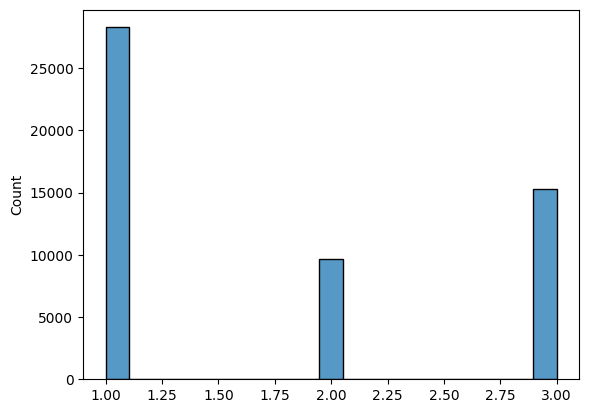

In [87]:
sns.histplot(mp_data['Max_Income_Activity'])

In [90]:
mp_data = mp_data.with_columns(
    pl.col('Max_Income_Activity').fill_null(value=2)
)

In [91]:
for col in mp_data[lev_03_occupation].columns:
    display(f" ========== {col} ========")
    display(check_unique(col))
    display("-------------------------------------------------")

' ========== Engaged_in_Economic_Activity_Las ========'

Engaged_in_Economic_Activity_Las contains : 2


shape: (2,)
Series: 'Engaged_in_Economic_Activity_Las' [i32]
[
	1
	2
]

None

'-------------------------------------------------'

' ========== Max_Income_Activity ========'

Max_Income_Activity contains : 3


shape: (3,)
Series: 'Max_Income_Activity' [i32]
[
	1
	2
	3
]

None

'-------------------------------------------------'

## Schema

In [92]:
summary(lev_03_scheme)

shape: (3, 1)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Benefitted_From_PMGKY ‚îÇ
‚îÇ ---                   ‚îÇ
‚îÇ i32                   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 2                     ‚îÇ
‚îÇ 1                     ‚îÇ
‚îÇ 2                     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ Benefitted_From_PMGKY ‚îÇ
‚îÇ ---        ‚îÜ ---                   ‚îÇ
‚îÇ str        ‚îÜ f64                   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 56420.0               ‚îÇ
‚îÇ null_count ‚îÜ 0.0                   ‚îÇ
‚îÇ mean       ‚îÜ 1.495073              ‚îÇ
‚îÇ std        ‚îÜ 0.49998               ‚îÇ
‚îÇ min        ‚îÜ 1.0                   ‚îÇ
‚îÇ 25%        ‚îÜ 1.0                   ‚îÇ
‚îÇ 50%        ‚îÜ 1.0                   ‚îÇ
‚îÇ 75%        ‚îÜ 2.0                   ‚îÇ
‚îÇ max        ‚îÜ 2.0                   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (1, 1)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Benefitted_From_PMGKY ‚îÇ
‚îÇ ---                   ‚îÇ
‚îÇ u32                   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0                     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (1, 1)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Benefitted_From_PMGKY ‚îÇ
‚îÇ ---                   ‚îÇ
‚îÇ f64                   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0.0                   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

<Axes: ylabel='Count'>

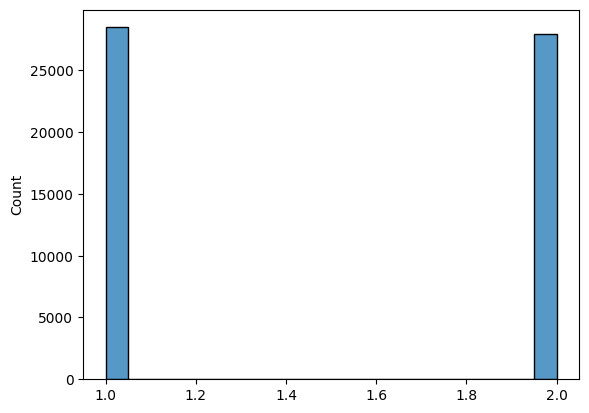

In [93]:
sns.histplot(mp_data['Benefitted_From_PMGKY'])

# Saving 

In [96]:
mp_data.write_csv(r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-03\data2\lev_03_mp_clean.csv")
mp_data.write_parquet(r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-03\data2\lev_03_mp_clean.parquet", compression="zstd")
print('Saved üôå')

Saved üôå
